In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [2]:
df = pd.read_excel(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\17-降水10降水異類53乾旱30_刪西曆月份起迄-9999_華中降水分級(樞紐分析前整理表單).xlsx')
#檔案欄位名稱
df.head()

,資料編號-文本ID,資料編號-事件編碼,rankP,資料判斷後，所屬年份,資料發生季節之持續天數,事件-事件敘述,事件編碼,空間-今隸屬省級,空間-今隸屬縣市,lon,lat,空間-高度,省縣-ID
0,553-17,17.000,0,1368,29,洪武改元，是歲夏六月，天大旱，禾盡槁，禱而大雨。,300130029;331110109;100110389;100130029,上海市,崇明縣,121.514319,31.653919,3.3,11007
1,553-17,17.001,-1,1368,55,冬復旱，麥不茁，又禱而雨。,300100009;331112009;100110389;100100009,上海市,崇明縣,121.514319,31.653919,3.3,11007
2,553-17,17.001,-1,1369,33,冬復旱，麥不茁，又禱而雨。,300100009;331112009;100110389;100100009,上海市,崇明縣,121.514319,31.653919,3.3,11007
3,553-18,18.000,0,1368,11,自壬戌以來，連日雨雪陰沍，至正月朔旦。,100100002;101100002;111130822,江蘇省,南京市,118.824123,32.118003,27.0,22026
4,554-02,2.000,-2,1368,88,七月丁酉，揚州府自五月不雨至於是月，旱傷苗稼。,100110189;300100009;330112009,江蘇省,揚州市,119.445274,32.406239,9.0,22040


In [3]:
LON = df[u'lon'].values
LAT = df[u'lat'].values
RANKP = df[u'rankP'].values
#LON = LON.astype('float64')
#LAT = LAT.astype('float64')
#RANKP = RANKP.astype('float64')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.314104714416
Full Sill: 1.97482341267
Range: 1.19451537314
Nugget: 1.66071869825 



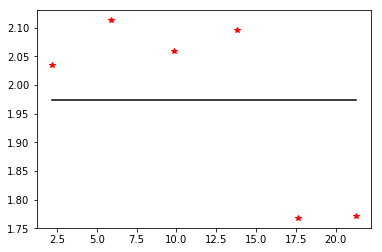

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [27]:
#要內插的點
#gridx, gridy = np.mgrid[108:126, 20:44]
gridx = np.arange(97.0, 123.0, 1.0)
gridy = np.arange(22.0, 35.0, 1.0)
# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='spherical',
verbose=True, enable_plotting=True)
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See OrdinaryKriging.__doc__ for more information.)
z, ss = OK.execute('grid', gridx, gridy)
# Writes the kriged grid to an ASCII grid file.
#kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

In [28]:
%matplotlib inline

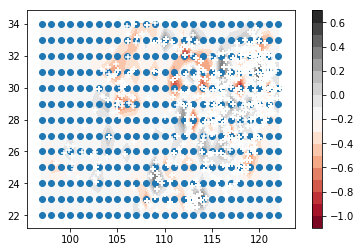

In [29]:
X, Y = np.meshgrid(gridx, gridy)
Z = z
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.scatter(X,Y)
plt.scatter(LON, LAT, c='w', marker='+')

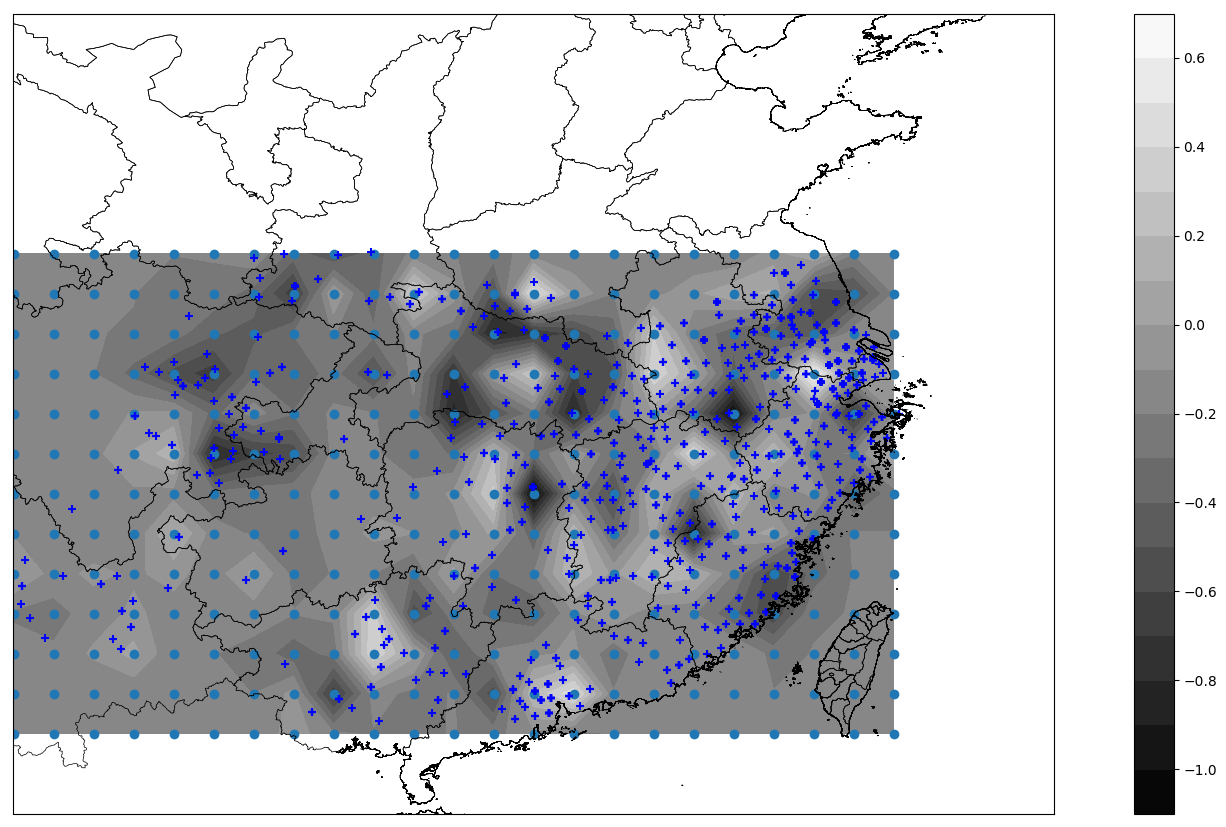

In [33]:
fig = plt.figure(figsize=(20,10),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.m = Basemap(llcrnrlon=100, llcrnrlat=20, urcrnrlon=126, urcrnrlat=40, projection='cyl', lat_1=20, lat_2=35, lon_0=110,resolution='h')
#ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='cyl', lat_1=20, lat_2=35, lon_0=120,resolution='h')
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='black')

X, Y = np.meshgrid(gridx, gridy)
Z = z
plt.contourf(X, Y, Z, 20, cmap='gray')
#plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.scatter(X,Y)
plt.scatter(LON, LAT, c='b', marker='+')

In [31]:
from netCDF4 import Dataset